# Week 4 - Neural Networks

In [1]:
%pylab inline
import viznet

Populating the interactive namespace from numpy and matplotlib


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
def _show():
    plt.axis('off')
    plt.axis('equal')
    plt.show()

## Neuron model: Logistic unit

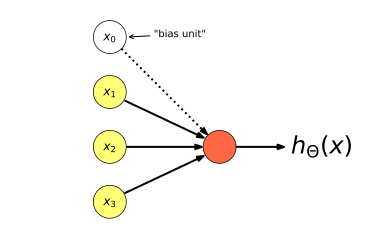

In [4]:
# Node Brushes
ib = viznet.NodeBrush('nn.input')
ob = viznet.NodeBrush('nn.output')
bb = viznet.NodeBrush('basic')
fb = viznet.NodeBrush('invisible')

# Edge Brushes
eb = viznet.EdgeBrush('->', lw=2)
ebd = viznet.EdgeBrush(':>', lw=2)

layer1 = viznet.node_sequence(ib, 3, center=(1,0.5), space=(0,-1))
layer2 = viznet.node_sequence(ob, 1, center=(3,0.5), space=(0,-1))
viznet.connecta2a(layer1, layer2, eb)
for i,n in enumerate(layer1):
    n.text(f'$x_{{{i+1}}}$')
n = bb >> (1,2.5)
n.text('$x_{0}$')
ebd >> (n, layer2[0])
f = fb >> (4.5,0.5)
f.text(r'$h_{\Theta}(x)$', fontsize=24, position='right', text_offset=-0.5)
eb >> (layer2[0], f)

# Annotations
n.ax.annotate(s='"bias unit"',
              xy=n.get_connection_point((1,0)),
              xytext=n.get_connection_point((1,0)) + (0.5,0), arrowprops=dict(arrowstyle='->'))

_show()

Drawing the **bias unit** is facultative.

> $\displaystyle h_{\theta}(\mathbf{x}) = \frac{1}{1 + e^{- \theta^{\top}\mathbf{x}}}$

**Sigmoid (logistic) activation function** is another term for the non-linearity $g(z) = \frac{1}{1 + e^{-z}}$

> $\displaystyle x = \begin{bmatrix}
    x_{0} \\
    x_{1} \\
    x_{2} \\
    x_{3}
\end{bmatrix},
\theta = \begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \theta_{2} \\
    \theta_{3}
\end{bmatrix}$

$\theta$ if also often called **weights** instead of **parameters** of the model.

## Neural Network

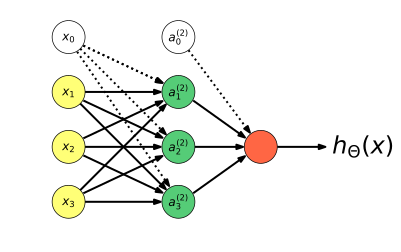

In [5]:
# Node Brushes
ib = viznet.NodeBrush('nn.input')
hb = viznet.NodeBrush('nn.hidden')
ob = viznet.NodeBrush('nn.output')
bb = viznet.NodeBrush('basic')
fb = viznet.NodeBrush('invisible')

# Edge Brushes
eb = viznet.EdgeBrush('->', lw=2)
ebd = viznet.EdgeBrush(':>', lw=2)

layer1 = viznet.node_sequence(ib, 3, center=(1,0.5), space=(0,-1))
layer2 = viznet.node_sequence(hb, 3, center=(3,0.5), space=(0,-1))
layer3 = viznet.node_sequence(ob, 1, center=(4.5,0.5), space=(0,-1))
viznet.connecta2a(layer1, layer2, eb)
viznet.connecta2a(layer2, layer3, eb)
for i,n in enumerate(layer1):
    n.text(f'$x_{{{i+1}}}$')
for i,n in enumerate(layer2):
    n.text(f'$a_{{{i+1}}}^{{(2)}}$')
n = bb >> (1,2.5)
n.text('$x_{0}$')
ebd >> (n, layer2[0])

a = bb >> (3,2.5)
a.text('$a_{0}^{(2)}$')
ebd >> (a, layer3[0])

f = fb >> (6,0.5)
f.text(r'$h_{\Theta}(x)$', fontsize=24, position='right', text_offset=-0.5)
eb >> (layer3[0], f)
viznet.connecta2a([n], layer2, ebd)

_show()

The first layer is called the **input layer**.

The last layer is called the **output layer**.

The layers between the first and the last are called the **hidden layers**.

### Hypothesis

> $a_1^{(2)} = g(\Theta_{1,0}^{(1)}x_0 + \Theta_{1,1}^{(1)}x_1 + \Theta_{1,2}^{(1)}x_2 + \Theta_{1,3}^{(1)}x_3)$

> $a_2^{(2)} = g(\Theta_{2,0}^{(1)}x_0 + \Theta_{2,1}^{(1)}x_1 + \Theta_{2,2}^{(1)}x_2 + \Theta_{2,3}^{(1)}x_3)$

> $a_3^{(2)} = g(\Theta_{3,0}^{(1)}x_0 + \Theta_{3,1}^{(1)}x_1 + \Theta_{3,2}^{(1)}x_2 + \Theta_{3,3}^{(1)}x_3)$

> $h_{\Theta}(x) = a_1^{(3)} = g(\Theta_{1,0}^{(2)}a_0^{(2)} + \Theta_{1,1}^{(2)}a_1^{(2)} + \Theta_{1,2}^{(2)}a_2^{(2)} + \Theta_{1,3}^{(2)}a_3^{(2)})$

$a_{i}^{(j)}$ is the **activation** of unit $i$ in layer $j$.

$\Theta^{(j)}$ is the matrix of weights controlling function mapping from layer $j$ to layer $j+1$.

If network has $S_j$ units in layer $j$,
$S_{j+1}$ units in layer $j+1$,
then $\Theta^{(j)} \in \mathbb{R}^{S_{j+1}\times (S_j + 1)}$.

## Forward Propagation: Vectorized Implementation

> $z^{(2)} = \Theta^{(1)}a^{(1)}, a^{(1)} = x$

> $a^{(2)} = g(z^{(2)})$

> $z^{(3)} = \Theta^{(2)}a^{(2)}$

> $h_{\Theta} = a^{(3)} = g(z^{(3)})$

$g$ is the sigmoid function.

## Multiple Output Units: One-vs-all


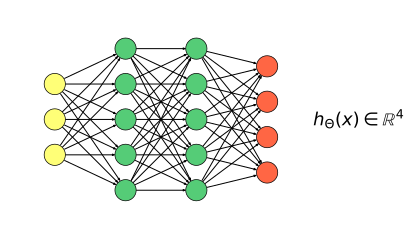

In [6]:
# Node Brushes
ib = viznet.NodeBrush('nn.input')
hb = viznet.NodeBrush('nn.hidden')
ob = viznet.NodeBrush('nn.output')
bb = viznet.NodeBrush('basic')
fb = viznet.NodeBrush('invisible')

# Edge Brushes
eb = viznet.EdgeBrush('->', lw=1)
ebd = viznet.EdgeBrush(':>', lw=2)

layer1 = viznet.node_sequence(ib, 3, center=(1,0.5), space=(0,-1))
layer2 = viznet.node_sequence(hb, 5, center=(3,0.5), space=(0,-1))
layer3 = viznet.node_sequence(hb, 5, center=(5,0.5), space=(0,-1))
layer4 = viznet.node_sequence(ob, 4, center=(7,0.5), space=(0,-1))
viznet.connecta2a(layer1, layer2, eb)
viznet.connecta2a(layer2, layer3, eb)
viznet.connecta2a(layer3, layer4, eb)

fn = fb >> (9,0.5)
fn.text('$h_{\Theta}(x) \in \mathbb{R}^4$', fontsize=18, position='right', text_offset=-1)

_show()

With a training set : $((x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \dots, (x^{(m)},y^{(m)}))$,

$\displaystyle y^{(i)}$ is one of 
    $\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$,
    $\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$,
    $\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$,
    $\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$.